In [226]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

**Lendo o CSV de algum ação usando pandas**


In [227]:
df = pd.read_excel('EVEN3.xlsx')

**Apagando todos valores nulos**

In [228]:
df.dropna(inplace=True)

**Checando os 10 primeiros itens**

In [229]:
df.head(10)

,timestamp,open,high,low,close,volume
0,2007-03-30,7.766604,7.766604,7.766604,7.766604,0.000
1,2007-04-02,7.084494,7.631533,6.854873,7.496462,45180.584
2,2007-04-03,7.597765,8.023240,7.428926,7.901676,11532.520
3,2007-04-04,7.766604,7.969211,7.645040,7.969211,3081.937
4,2007-04-05,7.786865,7.861154,7.651794,7.766604,2685.202
5,2007-04-09,7.894922,7.894922,7.638287,7.786865,7348.259
6,2007-04-10,7.732837,7.834140,7.672054,7.766604,3282.637
7,2007-04-11,7.766604,7.786865,7.300608,7.543737,5449.909
8,2007-04-12,7.428926,7.732837,7.428926,7.732837,2278.015
9,2007-04-13,7.699069,7.732837,7.496462,7.699069,2532.373


**Plotando o histórico de preços de fechamento usando matplotlib**

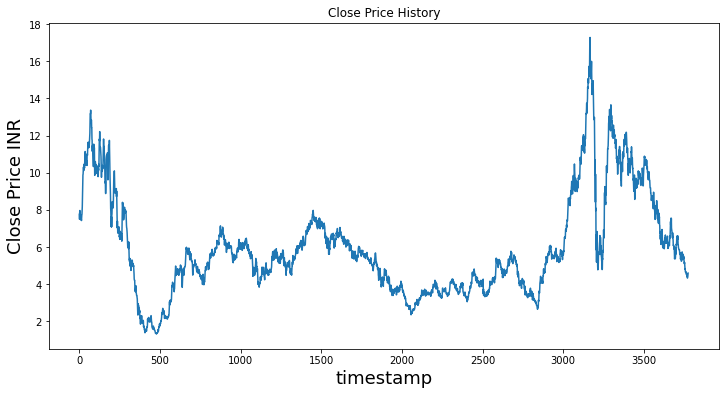

In [230]:
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.plot(df['close'])
#ax=sns.lineplot(data=df, x='timestamp',y='close', color="blue");
plt.xlabel('timestamp',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [231]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)

In [232]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [233]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

**Dividindo dados para treinamento e teste**

In [234]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [235]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

**Construindo um Modelo LSTM para Previsão do Mercado de Ações**

In [236]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

**Usando o otimizador adam e o erro_quadrático_médio como a função de perda**

In [237]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [238]:
model.fit(x_train, y_train, batch_size=64, epochs=1)

47/47 [==============================] - 6s 65ms/step - loss: 0.0088


In [239]:
test_data = scaled_data[training_data_len - 60: , : ]#Crie os conjuntos de dados x_test e y_test
x_test = []
y_test =  dataset[training_data_len : , : ] #Obtenha todas as linhas do índice 1603 para o resto e todas as colunas (neste caso, é apenas a coluna 'Close'), então 2003 - 1603 = 400 linhas de dados
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [240]:
x_test = np.array(x_test)

In [241]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [242]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

**Encontrando a raiz do erro quadrático médio**

In [243]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.9449205197558967

**Plotando os valores previstos**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


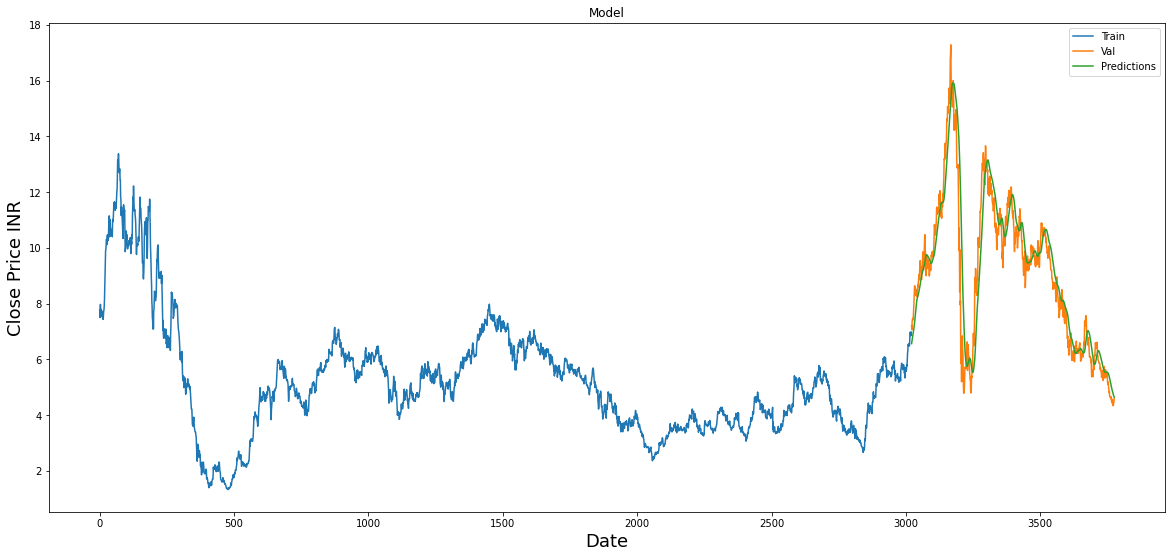

In [244]:
train = data[:training_data_len]
display = data[training_data_len:]
display['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(20,9))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['close'])
plt.plot(display['close'])
plt.plot(display['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()